In [87]:
import pandas as pd
df = pd.read_csv("GSE142481_PER403_797_CPM.txt", index_col=None, sep="\t", skiprows=1, names=[ 
    "gene_id",
    "gene_name",
    "PER403_dmso_1",
    "PER403_dmso_2",
    "PER403_gne_1",
    "PER403_gne_2", 
    "PER403_neo_1",
    "PER403_neo_2", 
    "PER403_otx_1",
    "PER403_otx_2", 
    "PER403_otx_gne_1",
    'PER403_otx_gne_2',
    'TC797_dmso_1',
    'TC797_dmso_2', 
    'TC797_gne_1', 
    'TC797_gne_2', 
    'TC797_neo_1',
    'TC797_neo_2', 
    'TC797_otx_1', 
    'TC797_otx_2', 
    'TC797_otx_gne_1',
    'TC797_otx_gne_2'
])
df["gene_id_root"] = df["gene_id"].str.split(".").map(lambda x: x[0])

In [88]:
df["PER403"] = (df.PER403_dmso_1 + df.PER403_dmso_2) / 2
df["TC797"] = (df.TC797_dmso_1 + df.TC797_dmso_2) / 2

In [101]:
df_lines = df[["gene_id", "gene_id_root", "gene_name", "PER403", "TC797"]]

In [102]:
df_lines[df_lines.gene_name == "NUTM1"]

,gene_id,gene_id_root,gene_name,PER403,TC797
10371,ENSG00000184507.15,ENSG00000184507,NUTM1,6.064538,6.200746


In [152]:
df_lines_high = df_lines[(df_lines.PER403 > 6) & (df_lines.TC797 > 6)]

In [153]:
df_expr = pd.read_csv("rna_tissue_consensus.tsv", sep="\t")

In [154]:
gene_ids = set(df_expr.Gene)
CTA_gene_names = set()
CTA_gene_ids = set()
for gene_id, sub_df in df_expr.groupby("Gene"):
    total = sub_df.nTPM.sum()
    if total == 0:
        continue
    testis = sub_df[sub_df.Tissue == "testis"]["nTPM"].sum()
    frac = testis/total
    if frac > 0.9:
        CTA_gene_ids.add(gene_id)
        CTA_gene_names.add(sub_df["Gene name"].iloc[0])

In [155]:
CTA_gene_names

{'AC002456.2',
 'AC007325.1',
 'AC010255.2',
 'AC010325.1',
 'AC023491.2',
 'AC026786.1',
 'AC134980.2',
 'AC171558.1',
 'AC171558.3',
 'AC231656.1',
 'ACSBG2',
 'ACTL7A',
 'ACTL7B',
 'ACTL8',
 'ACTL9',
 'ACTRT1',
 'ACTRT2',
 'ADAD1',
 'ADAM18',
 'ADAM2',
 'ADAM29',
 'ADAM30',
 'AKAP4',
 'AL035460.1',
 'AL772284.1',
 'ANHX',
 'ANKRD30BL',
 'ANKRD7',
 'ASB17',
 'ATXN3L',
 'BOD1L2',
 'BPIFA3',
 'BX072566.1',
 'C10orf120',
 'C10orf62',
 'C11orf94',
 'C12orf40',
 'C12orf50',
 'C16orf78',
 'C16orf82',
 'C16orf90',
 'C17orf50',
 'C17orf64',
 'C17orf98',
 'C18orf63',
 'C1orf100',
 'C1orf185',
 'C20orf141',
 'C20orf144',
 'C20orf173',
 'C2orf78',
 'C3orf22',
 'C3orf56',
 'C4orf17',
 'C4orf51',
 'C5orf47',
 'C8orf74',
 'C9orf57',
 'CABS1',
 'CAGE1',
 'CALR3',
 'CAPZA3',
 'CATSPER4',
 'CATSPERZ',
 'CBLL2',
 'CBY2',
 'CCDC105',
 'CCDC166',
 'CCDC168',
 'CCDC179',
 'CCDC182',
 'CCDC185',
 'CCDC42',
 'CCDC54',
 'CCDC70',
 'CCDC83',
 'CCER1',
 'CCT8L2',
 'CD200R1L',
 'CDY1',
 'CDY1B',
 'CDY2B',
 'CE

In [156]:
df_sub.nTPM.sum()

21.2

In [157]:
len(CTA_gene_names)

427

In [158]:
len(CTA_gene_ids)

427

In [159]:
mask = df_lines_high.gene_id_root.isin(CTA_gene_ids)
mask.sum()

1

In [160]:
df_lines_high

,gene_id,gene_id_root,gene_name,PER403,TC797
0,ENSG00000225972.1,ENSG00000225972,MTND1P23,6.996814,7.294854
1,ENSG00000225630.1,ENSG00000225630,MTND2P28,6.906842,6.363584
2,ENSG00000237973.1,ENSG00000237973,MTCO1P12,9.695386,10.121753
5,ENSG00000248527.1,ENSG00000248527,MTATP6P1,9.610184,9.423643
12,ENSG00000188976.11,ENSG00000188976,NOC2L,8.257366,8.252355
...,...,...,...,...,...
15296,ENSG00000212907.2,ENSG00000212907,MT-ND4L,9.998498,9.945455
15297,ENSG00000198886.2,ENSG00000198886,MT-ND4,13.238789,12.970896
15298,ENSG00000198786.2,ENSG00000198786,MT-ND5,12.558341,12.485287
15299,ENSG00000198695.2,ENSG00000198695,MT-ND6,7.576112,7.188325


In [161]:
df_lines_high.gene_name[mask]

10371    NUTM1
Name: gene_name, dtype: object

In [185]:
!pip install matplotlib-venn

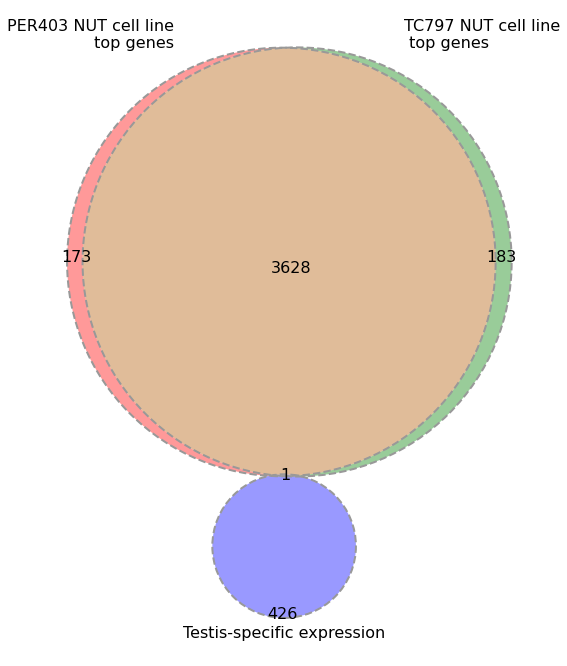

In [209]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 12))
per403 = set(df_lines[df_lines.PER403 > 6].gene_name)
tc797 = set(df_lines[df_lines.TC797 > 6].gene_name)
CTAs = CTA_gene_names

vd3=venn3([per403, tc797, CTAs],
 set_labels=('PER403 NUT cell line\n top genes', 'TC797 NUT cell line\n top genes', 'Testis-specific expression'))
 #set_colors=('#c4e6ff', '#F4ACB7', '#9D8189'), 
 #alpha = 0.9)
for text in vd3.set_labels:
    text.set_fontsize(16);
for text in vd3.subset_labels:
    if text:
        text.set_fontsize(16)
venn3_circles([per403, tc797,CTAs], linestyle='--', linewidth=2, color='#999')

fig.savefig("venn.png")

In [222]:
gene_ids = set(df_expr.Gene)
extreme_CTA_gene_names = set()
extreme_CTA_gene_ids = set()
null_gene_ids = set()
null_gene_names = set()
near_null_gene_names = set()

for gene_id, sub_df in df_expr.groupby("Gene"):
    total = sub_df.nTPM.sum()
    
    if total < 1:
        near_null_gene_names.add(sub_df["Gene name"].iloc[0])
    if total == 0:
        null_gene_ids.add(gene_id)
        null_gene_names.add(sub_df["Gene name"].iloc[0])
        continue 
    testis = sub_df[sub_df.Tissue == "testis"]["nTPM"].sum()
    frac = testis/total
    if frac > 0.9999:
        extreme_CTA_gene_ids.add(gene_id)
        extreme_CTA_gene_names.add(sub_df["Gene name"].iloc[0])

In [212]:
len(null_gene_names)

220

In [214]:
len(extreme_CTA_gene_names)

147

In [215]:
extreme_CTA_gene_names

{'AC026786.1',
 'AC134980.2',
 'AC171558.1',
 'AC171558.3',
 'AC231656.1',
 'ACTL9',
 'ADAM30',
 'BPIFA3',
 'BX072566.1',
 'C3orf22',
 'C3orf56',
 'C4orf17',
 'C8orf74',
 'CCDC166',
 'CCER1',
 'CCT8L2',
 'CDY1',
 'CDY1B',
 'CDY2B',
 'CNGA2',
 'CT45A2',
 'CT47A1',
 'CT47A10',
 'CT47A11',
 'CT47A2',
 'CT47A3',
 'CT47A4',
 'CT47A5',
 'CT47A6',
 'CT47A7',
 'CT47A8',
 'CT47A9',
 'CT47B1',
 'CTAGE1',
 'CXorf49',
 'CXorf49B',
 'CXorf51A',
 'CYLC1',
 'DBX1',
 'DCAF4L2',
 'DCAF8L1',
 'DNAJB8',
 'FAM47B',
 'FAM71B',
 'FBXO47',
 'FGF4',
 'FTMT',
 'GAGE12C',
 'GAGE12D',
 'GAGE12H',
 'GOLGA6L6',
 'GOLGA8G',
 'GOLGA8S',
 'H3Y2',
 'HNRNPCL1',
 'KLF18',
 'LRRC72',
 'LUZP4',
 'LYZL2',
 'MAGEA1',
 'MAGEA9',
 'MAGEB16',
 'MAGEB18',
 'MAGEB5',
 'MAGEB6',
 'MAGEB6B',
 'MAGEC2',
 'MBD3L2B',
 'MS4A13',
 'NOBOX',
 'ODF4',
 'OOSP2',
 'OR2F2',
 'OR2H1',
 'OR2W1',
 'OR4D6',
 'OR4K1',
 'OR4M1',
 'OR4M2',
 'OR4N4',
 'OR51A7',
 'OR52L1',
 'OR56A3',
 'OR5AC2',
 'OR5B21',
 'OR5H6',
 'OR7E24',
 'OR9Q2',
 'PASD1',
 'PD

In [223]:
len(near_null_gene_names)

521

In [225]:
per403.intersection(near_null_gene_names)

set()

In [226]:
df_lines[df_lines.gene_name.str.startswith("HLA")]

,gene_id,gene_id_root,gene_name,PER403,TC797
4813,ENSG00000204642.14,ENSG00000204642,HLA-F,3.665610,3.727793
4814,ENSG00000214922.9,ENSG00000214922,HLA-F-AS1,-1.076300,-0.303666
4816,ENSG00000204632.11,ENSG00000204632,HLA-G,1.298096,1.358890
4819,ENSG00000206341.7,ENSG00000206341,HLA-H,3.183960,2.622949
4821,ENSG00000230795.3,ENSG00000230795,HLA-K,1.692371,1.762516
4822,ENSG00000206503.13,ENSG00000206503,HLA-A,9.282045,9.120072
4824,ENSG00000204622.11,ENSG00000204622,HLA-J,1.368614,1.705317
4834,ENSG00000243753.5,ENSG00000243753,HLA-L,1.947362,1.559769
4839,ENSG00000204592.9,ENSG00000204592,HLA-E,6.345620,6.405396
4865,ENSG00000204525.16,ENSG00000204525,HLA-C,8.533315,8.388806


In [227]:
df_lines[df_lines.gene_name.str.startswith("B2M")]

,gene_id,gene_id_root,gene_name,PER403,TC797
10477,ENSG00000166710.19,ENSG00000166710,B2M,8.686545,8.724736


In [260]:
data = {}
data["gene_name"] = list(df_lines["gene_name"]) + list(df_lines["gene_name"])
data["gene_id"] = list(df_lines.gene_id_root) + list(df_lines.gene_id_root)
data["expression"] = list(df_lines["PER403"]) + list(df_lines["TC797"])
data["cell-line"] = ["PER403"] * len(df_lines) + ["TC797"] * len(df_lines)

df_plot = pd.DataFrame(data)
df_plot["gene_type"] = ["HLA" if name in {"HLA-A", "HLA-B", "HLA-C"} else "B2M" if name == "B2M" else "NUTM1" if name == "NUTM1" else "CTA" if gene_id in CTA_gene_ids else "other" for name, gene_id in zip(df_plot["gene_name"], df_plot["gene_id"])]

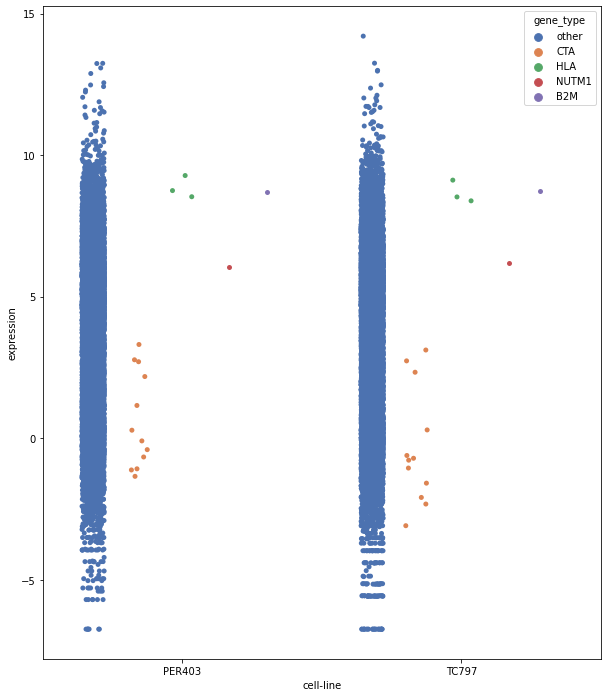

In [261]:

import seaborn as sns
fig = plt.figure(figsize=(10,12))
sns.stripplot(data=df_plot, y="expression", x="cell-line", hue="gene_type", dodge=True, jitter=0.2, palette="deep")
fig.savefig('expression-HLA-B2M.png')

In [257]:
gene_id

'ENSG00000288695'